In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rnd
import seaborn as sb

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

%matplotlib inline

In [3]:
dataset=pd.read_csv('store.csv')
dataset.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,NaN,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [4]:
print(dataset.columns)

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')


In [5]:
print(dataset.info)

<bound method DataFrame.info of         Duration           Start date             End date  \
0           1012  2010-09-20 11:27:04  2010-09-20 11:43:56   
1             61  2010-09-20 11:41:22  2010-09-20 11:42:23   
2           2690  2010-09-20 12:05:37  2010-09-20 12:50:27   
3           1406  2010-09-20 12:06:05  2010-09-20 12:29:32   
4           1413  2010-09-20 12:10:43  2010-09-20 12:34:17   
5            982  2010-09-20 12:14:27  2010-09-20 12:30:50   
6            930  2010-09-20 12:15:26  2010-09-20 12:30:56   
7           1659  2010-09-20 12:16:36  2010-09-20 12:44:15   
8           2496  2010-09-20 12:18:38  2010-09-20 13:00:15   
9           1487  2010-09-20 12:19:46  2010-09-20 12:44:34   
10          1007  2010-09-20 12:21:52  2010-09-20 12:38:39   
11          1159  2010-09-20 12:26:08  2010-09-20 12:45:27   
12            88  2010-09-20 12:31:18  2010-09-20 12:32:46   
13           202  2010-09-20 12:33:05  2010-09-20 12:36:28   
14          1407  2010-09-20 12:39:24 

In [6]:
dataset.isnull().any()
dataset=dataset.fillna(method='ffill')
dataset.isnull().any()

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool

In [7]:
dataset.shape

(115597, 9)

In [8]:
dataset.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,4th & M St SW,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [9]:
dataset=dataset.drop('Start date',axis=1)
dataset=dataset.drop('End date',axis=1)
dataset=dataset.drop('Start station',axis=1)
dataset=dataset.drop('End station',axis=1)

In [10]:
dataset.head()

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,W00742,Member
1,61,31209,31209,W00032,Member
2,2690,31600,31100,W00993,Member
3,1406,31600,31602,W00344,Member
4,1413,31100,31201,W00883,Member


In [11]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(dataset['Bike number'])
dataset['Bike number']=le.transform(dataset['Bike number'])

In [12]:
dataset.head()

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,614,Member
1,61,31209,31209,41,Member
2,2690,31600,31100,836,Member
3,1406,31600,31602,282,Member
4,1413,31100,31201,734,Member


In [13]:
le=LabelEncoder()
le.fit(dataset['Member type'])
dataset['Member type']=le.transform(dataset['Member type'])

In [14]:
dataset.head()

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,614,1
1,61,31209,31209,41,1
2,2690,31600,31100,836,1
3,1406,31600,31602,282,1
4,1413,31100,31201,734,1


In [15]:
#Find dependent and independent variables

X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
print(X)
print(Y)

[[ 1012 31208 31108   614]
 [   61 31209 31209    41]
 [ 2690 31600 31100   836]
 ...
 [  737 31602 31401   819]
 [  514 31111 31202   946]
 [51962 31111 31111   636]]
[1 1 1 ... 1 1 0]


In [16]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [20]:
pd.DataFrame(x_train).head()

,0,1,2,3
0,0.522715,-1.408055,1.890279,-1.366274
1,-0.316593,-1.413384,-1.369770,-1.479103
2,-0.146742,-0.283587,-0.897143,1.079556
3,0.066345,0.180057,-0.365438,0.391666
4,-0.079144,-0.203648,1.831201,0.584567


In [21]:
#Fitting Naive Bayes classifier into training set

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
predicted=classifier.predict(x_test)

In [36]:
predicted[0]

1

In [ ]:
predicted[1]

In [ ]:
predicted[0]

In [ ]:
predicted[0]

In [ ]:
predicted[0]

In [ ]:
predicted[0]

In [ ]:
predicted[0]

In [31]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
print(cm)

[[ 1497  4592]
 [  131 22680]]


In [32]:
#Accuracy

accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print(accuracy)

0.8365743944636678


In [33]:
import seaborn as sn

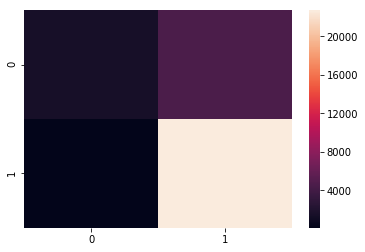

In [34]:
sn.heatmap(cm)